Practical 01: Implement Feed Forward NN and train the network with different optimizers and compare

In [2]:
# Import Statements
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelBinarizer

# Load Iris Dataset
iris = load_iris()

# Get Features and output
X = iris.data
y = iris.target

# One-hot encode labels
lb = LabelBinarizer()
y = lb.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# Define Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile model with different optimizers
optimizers = ['adam', 'sgd', 'rmsprop']
for optimizer in optimizers:
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0) # Try with different epochs and verbose

    # Evaluate model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Optimizer', optimizer)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)

c:\Users\HEAVEN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Optimizer adam
Test loss: 0.4969386160373688
Test accuracy: 0.9666666388511658
Optimizer sgd
Test loss: 0.231454536318779
Test accuracy: 1.0
Optimizer rmsprop
Test loss: 0.1345217078924179
Test accuracy: 1.0


Practical 02: Implementing binary classification using a publicly available dataset (Breast Cancer Wisconsin dataset) with L2 regularization in Tensorflow/Keras

In [3]:
#Import statements
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness",
                "Mean Compactness", "Mean Concavity", "Mean Concave Points", "Mean Symmetry", "Mean Fractal Dimension",
                "SE Radius", "SE Texture", "SE Perimeter", "SE Area", "SE Smoothness", "SE Compactness",
                "SE Concavity", "SE Concave Points", "SE Symmetry", "SE Fractal Dimension", "Worst Radius",
                "Worst Texture", "Worst Perimeter", "Worst Area", "Worst Smoothness", "Worst Compactness",
                "Worst Concavity", "Worst Concave Points", "Worst Symmetry", "Worst Fractal Dimension"]

#Load the dataset
data = pd.read_csv(url, header=None, names=column_names)

#Map Maligant (M) to 1 and Benign (B) to 0
data['Diagnosis'] = data['Diagnosis'].map({'M':1,'B':0})

#Split features and target
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Define model architecture
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(1, activation='sigmoid')
])

#Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.1)

#Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy: ", test_acc)

Epoch 1/50


c:\Users\HEAVEN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4573 - loss: 0.8052 - val_accuracy: 0.9130 - val_loss: 0.5581
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9245 - loss: 0.4865 - val_accuracy: 0.9783 - val_loss: 0.3403
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9607 - loss: 0.2970 - val_accuracy: 1.0000 - val_loss: 0.2438
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9742 - loss: 0.2223 - val_accuracy: 0.9783 - val_loss: 0.2069
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9817 - loss: 0.1996 - val_accuracy: 0.9783 - val_loss: 0.1921
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9849 - loss: 0.1825 - val_accuracy: 0.9783 - val_loss: 0.1832
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9856 - loss: 0.1719 - val_accuracy: 0.9783 - val_loss: 0.1750
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9735 - loss: 0.1672 - val_accuracy: 0.9783 - val_loss: 0.1691
Ep

Practical 03: Program to implement regularization to prevent the model from overfitting

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8124 - loss: 1.9120 - val_accuracy: 0.9214 - val_loss: 0.6054
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9185 - loss: 0.5949 - val_accuracy: 0.9343 - val_loss: 0.5103
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9268 - loss: 0.5103 - val_accuracy: 0.9392 - val_loss: 0.4642
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9354 - loss: 0.4631 - val_accuracy: 0.9396 - val_loss: 0.4267
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9400 - loss: 0.4327 - val_accuracy: 0.9461 - val_loss: 0.4043
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9445 - loss: 0.4071 - val_accuracy: 0.9508 - val_loss: 0.3849
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9453 - loss: 0.3895 - val_accuracy: 0.9447 - val_loss: 0.3861
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9468 - loss: 0.3781 - val_accuracy: 0.

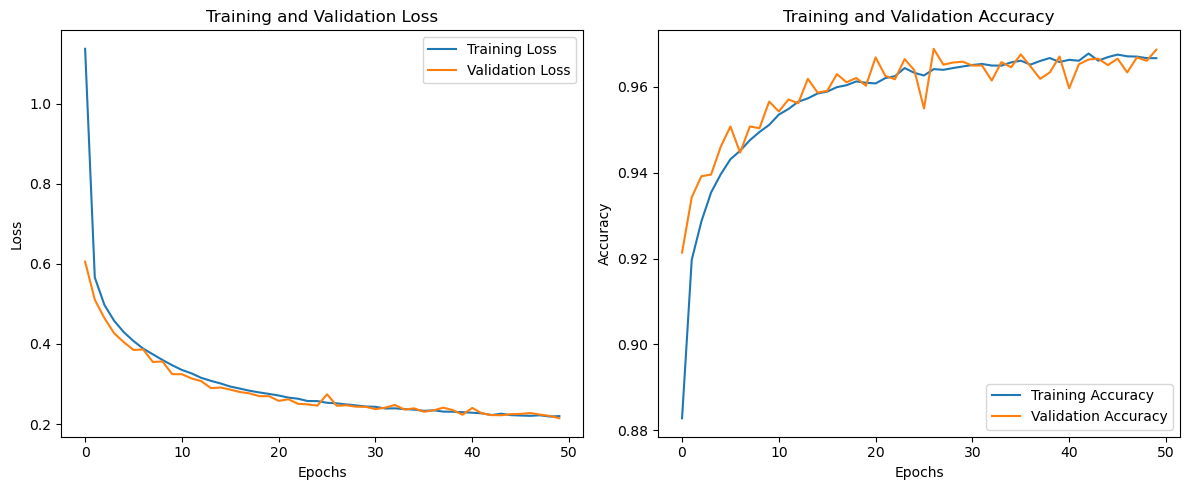

In [4]:
#Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

#Load the data
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

#Preprocess the data
train_data = train_data.reshape((60000, 784))/255.0
test_data = test_data.reshape((10000,784))/255.0
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels =tf.keras.utils.to_categorical(test_labels)

#Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,),kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')

])

#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train the model
history = model.fit(train_data, train_labels, epochs=50, batch_size=128, validation_data=(test_data,test_labels))

#Plot training loss and validation loss
plt.figure(figsize=(12,5))

#Plot the training loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Plot the training accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Practical 04: Implement DL for the prediction of the autoencoder from the test data (eg MNIST dataset)

c:\Users\HEAVEN\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2785 - val_loss: 0.1412
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1368 - val_loss: 0.1218
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1205 - val_loss: 0.1130
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1118 - val_loss: 0.1064
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1066 - val_loss: 0.1033
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1035 - val_loss: 0.1005
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1012 - val_loss: 0.0983
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0990 - val_loss: 0.0966
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0970 - val_loss: 0.0946
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0954 - val_loss: 0.0939
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


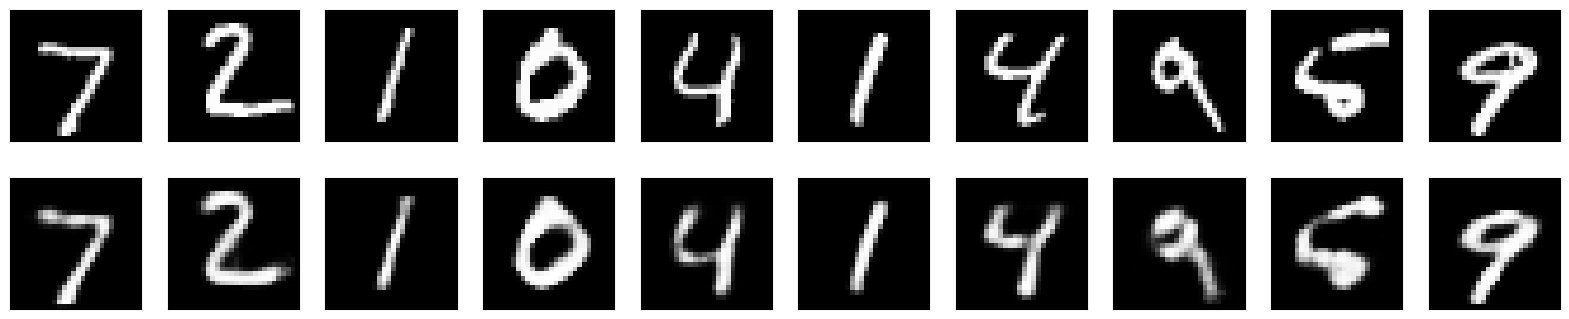

In [5]:
#Import statements
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#Load the dataset
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()

#Normalise the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#Define the encoder architecture
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
])

#Define the decoder architecture
decoder = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=[32]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

#Combine the encoder and decoder into an autoencoder model
autoencoder = keras.models.Sequential([encoder, decoder])

#Compile the autoencoder model
autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate = 0.001))

#Train the autoencoder model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=(X_test, X_test))

#Use the trained autoencoder to predict the reconstructed images for the test data
decoded_imgs = autoencoder.predict(X_test)

#Plot some of the original test images and their reconstructed counterparts
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Practical 05: Implement Convolutional Neural Network for Digit Recognition on the MNIST Dataset

Epoch 1/15


c:\Users\HEAVEN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.8515 - loss: 0.5353 - val_accuracy: 0.9771 - val_loss: 0.0700
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9777 - loss: 0.0729 - val_accuracy: 0.9800 - val_loss: 0.0654
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9843 - loss: 0.0520 - val_accuracy: 0.9845 - val_loss: 0.0476
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9884 - loss: 0.0383 - val_accuracy: 0.9868 - val_loss: 0.0394
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9912 - loss: 0.0298 - val_accuracy: 0.9889 - val_loss: 0.0324
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accuracy: 0.9883 - val_loss: 0.0355
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9943 - loss: 0.0182 - val_accuracy: 0.9907 - val_loss: 0.0300
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9952 - loss: 0.0152 - val_accurac

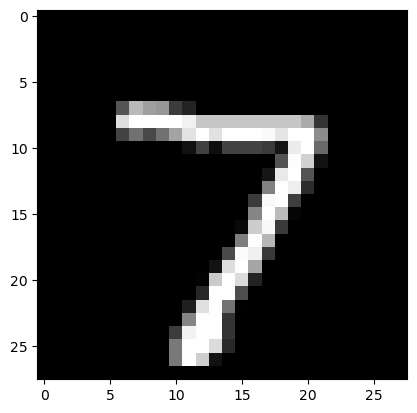

In [6]:
#Import statements
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#Load the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

#Normalise the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

#Define the CNN architecture
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))

#Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

#Show prediction for a sample input image
sample_image = X_test[0]
sample_label = y_test[0]
sample_image = np.expand_dims(sample_image, 0)
pred = model.predict(sample_image)
pred_label = np.argmax(pred)
print('Predicted label:', pred_label)
print('True label:', sample_label)

#Display the sample image
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.show()

Practical 06: Transfer Learning on Suitable Dataset

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


c:\Users\HEAVEN\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 16s/step - accuracy: 0.5597 - loss: 0.7146 - val_accuracy: 0.5950 - val_loss: 0.6751
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 16s/step - accuracy: 0.5558 - loss: 0.7239 - val_accuracy: 0.5730 - val_loss: 0.6600
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 77s 19s/step - accuracy: 0.5226 - loss: 0.7487 - val_accuracy: 0.6240 - val_loss: 0.6400
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 104s 26s/step - accuracy: 0.5257 - loss: 0.7599 - val_accuracy: 0.6040 - val_loss: 0.6386
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 76s 19s/step - accuracy: 0.6089 - loss: 0.6420 - val_accuracy: 0.6460 - val_loss: 0.6193
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


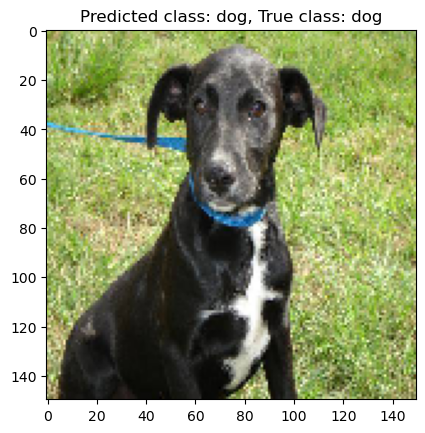

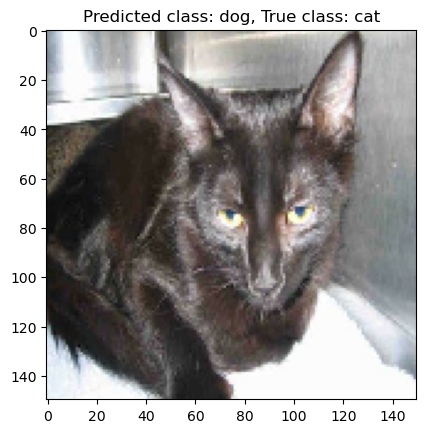

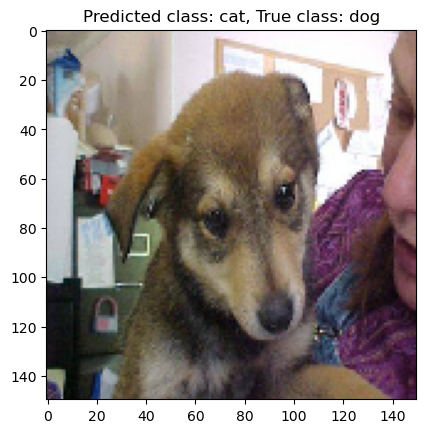

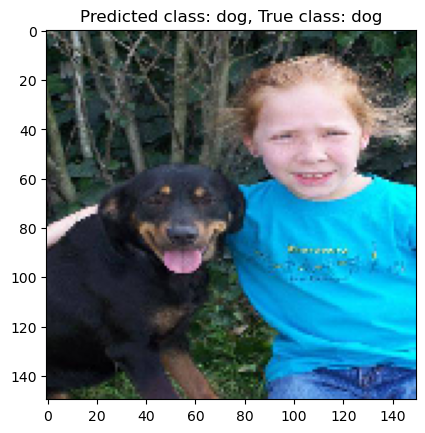

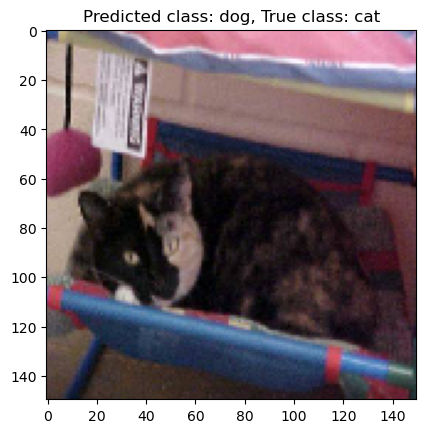

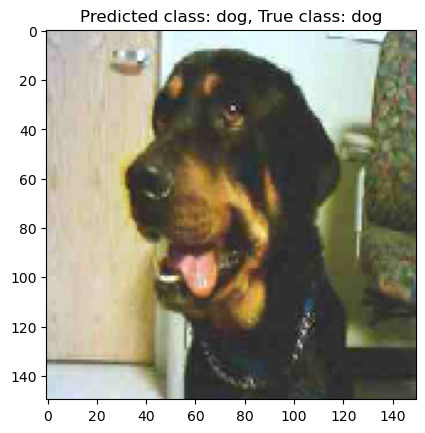

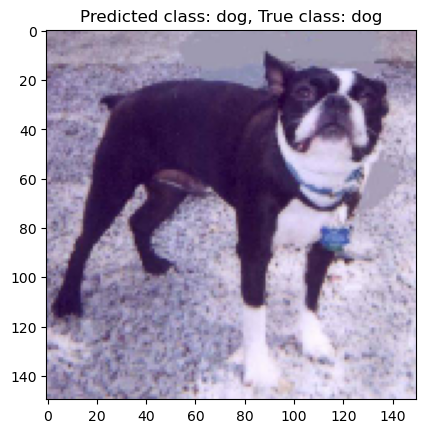

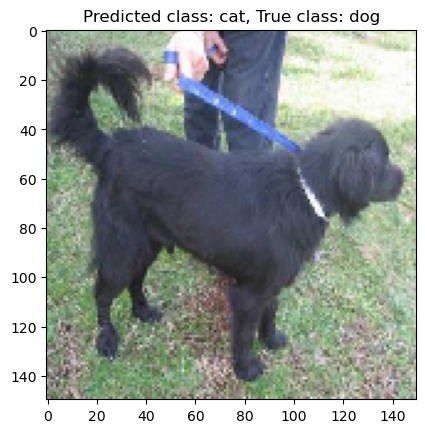

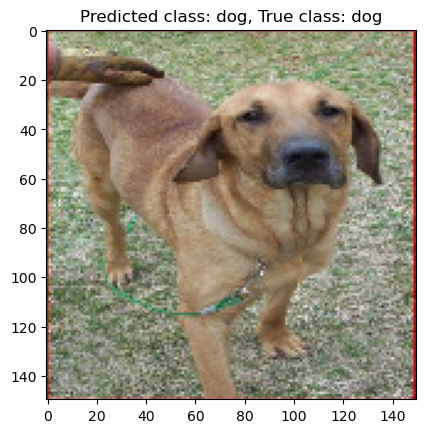

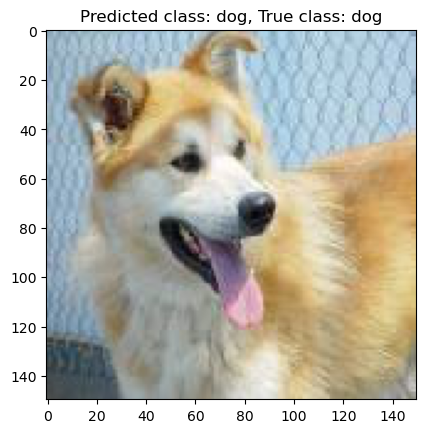

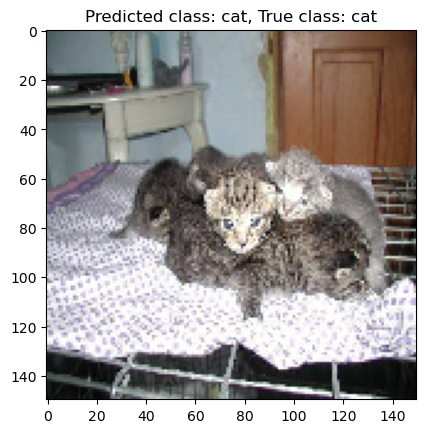

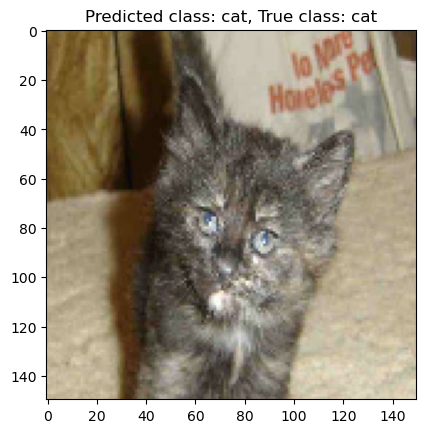

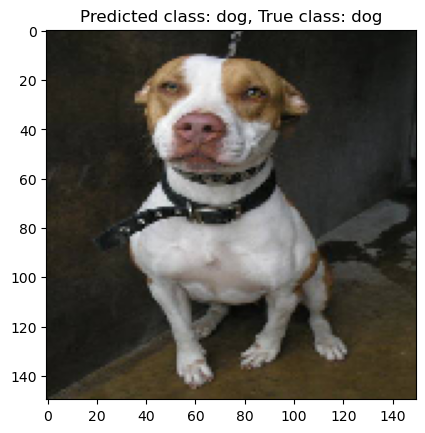

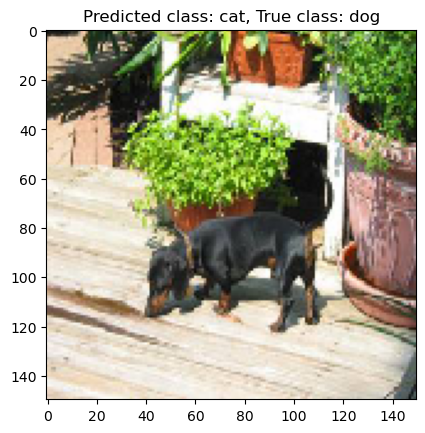

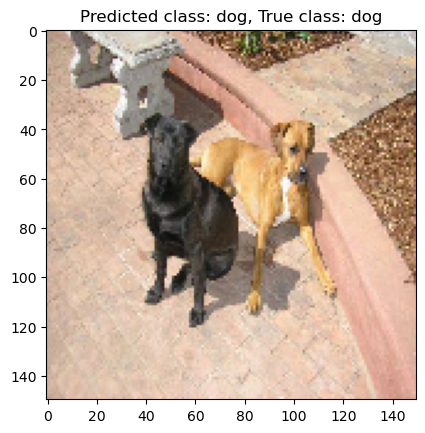

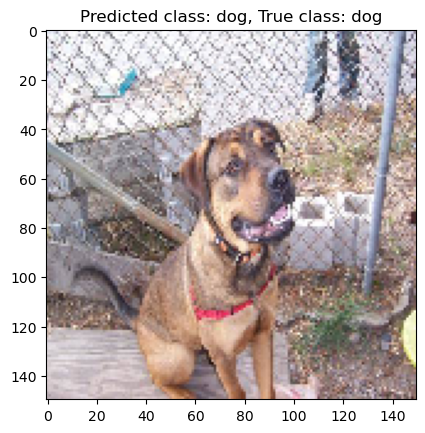

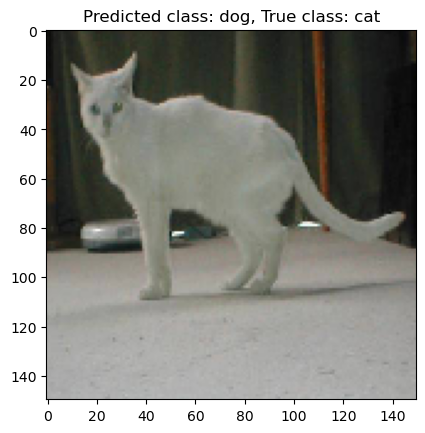

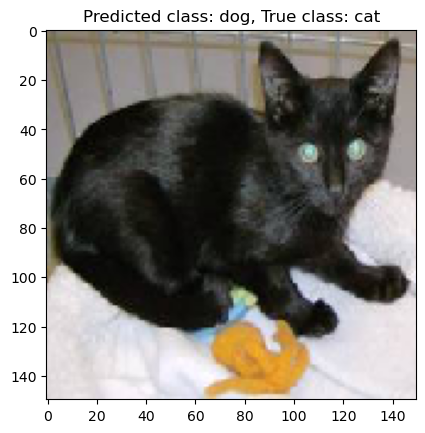

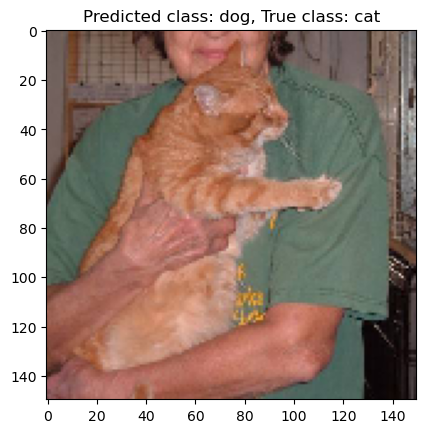

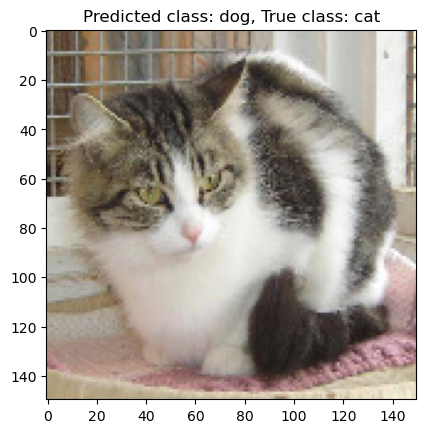

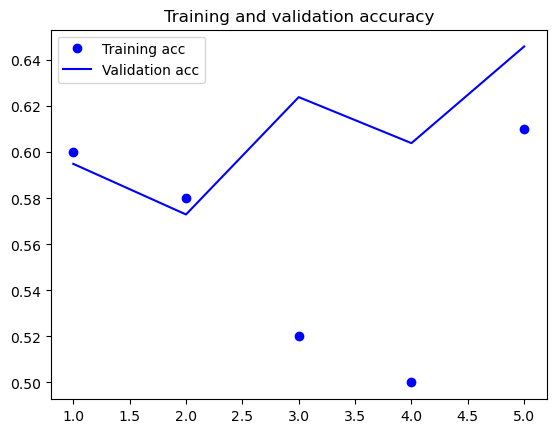

In [7]:
# Implement Transfer learning on the suitable public dataset (e.g. classify the cats versus dogs dataset from Kaggle or UCI or inbuilt dataset)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow.keras.models
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Download and extract dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
filename = "cats_and_dogs_filtered.zip"  # Just the filename
cached_file_path = tf.keras.utils.get_file(filename, url, cache_dir=os.getcwd())  # Specify cache_dir and get the path
#Use the cached file path instead of just the filename
with zipfile.ZipFile(cached_file_path, "r") as zip_ref:
    zip_ref.extractall()

#Define data generators
train_dir = os.path.join(os.getcwd(), "cats_and_dogs_filtered","train")
validation_dir = os.path.join(os.getcwd(), "cats_and_dogs_filtered","validation")

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = "binary")

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size = (150,150),
                                                              batch_size = 20,
                                                              class_mode = "binary"
                                                              )

# Load pre - trained VGG16 model
conv_base = VGG16(weights = "imagenet",
                  include_top = False,
                  input_shape = (150,150,3))

#Freeze convolutional base layers
conv_base.trainable = False

#Build model on top of the convolutional base
model = tf.keras.models.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,activation = "sigmoid"))

#Compile model
model.compile(loss = "binary_crossentropy",
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 2e-5),
              metrics = ["accuracy"])

#Train model
history = model.fit(train_generator,
                    steps_per_epoch = 5,
                    epochs = 5,
                    validation_data = validation_generator,
                    validation_steps = 50)

#Show sample input and its predicted class
x, y_true = next(validation_generator)
y_pred = model.predict(x)
class_names = ['cat','dog']

for i in range(len(x)):
    plt.imshow(x[i])
    plt.title(f'Predicted class: {class_names[int(round(y_pred[i][0]))]}, True class: {class_names[int(y_true[i])]}')
    plt.show()

#Plot accuracy and loss over time
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.show()

Practical 07: Stock Price Prediction using LSTM and GRU Models

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
c:\Users\HEAVEN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 883.6464
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 569.0513
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 344.0437
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 257.8882
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 212.6799
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 174.8923
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 146.8588
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 129.3768
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 110.2082
Epoch 10/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 81.2799
Epoch 11/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 81.0417
Epoch 12/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 65.3063
Epoch 13/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 47.4622
Epoch 14/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 48.9203
Epoch 15/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/s

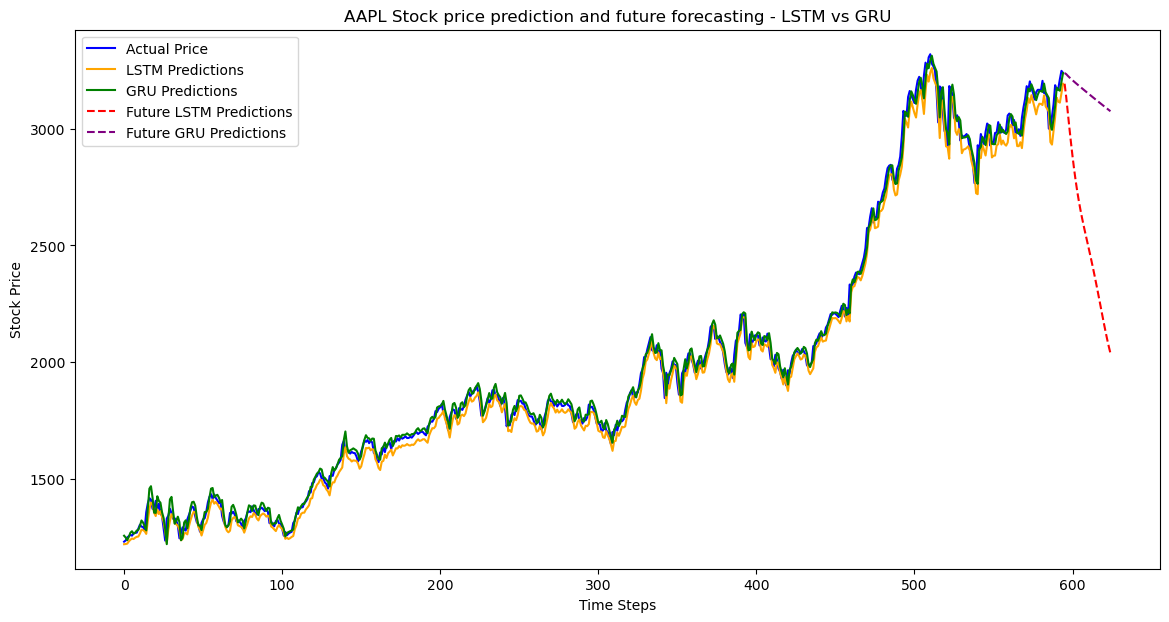

In [9]:
#Import Statements
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

#Load stock data from Yahoo Finance
stock_symbol = 'AAPL'
df = yf.download(stock_symbol, start="2010-01-01", end="2023-01-01")

#Use the 'Close' price for modeling
data = df[['Close']].values

#Normalise the data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

#Split the data into train and test sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[0:train_size], data_scaled[train_size:]

#Convert the data into time-series format
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[i+look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

#Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Build LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(look_back, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')

#Build GRU Model
model_gru = Sequential()
model_gru.add(GRU(50, input_shape=(look_back, 1)))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')

#Train the model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
model_gru.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

#Make Predictions
lstm_predictions = model_lstm.predict(X_test)
gru_predictions = model_gru.predict(X_test)

#Inverse transform predictions and actual values
lstm_predictions = scaler.inverse_transform(lstm_predictions)
gru_predictions = scaler.inverse_transform(gru_predictions)
y_test_actual = scaler.inverse_transform([y_test])

#Future predictions (next 30 days)
future_steps = 30
last_sequence = X_test[-1] #Last sequence in test data

#Predict future predictions using the LSTM Model
future_predictions_lstm = []
for i in range(future_steps):
    prediction = model_lstm.predict(np.reshape(last_sequence, (1, look_back, 1)))
    future_predictions_lstm.append(prediction[0][0])
    last_sequence = np.append(last_sequence[1:], prediction[0][0])

#Predict future prices using the GRU Model
last_sequence = X_test[-1]
future_predictions_gru = []
for i in range(future_steps):
    prediction = model_gru.predict(np.reshape(last_sequence, (1, look_back, 1)))
    future_predictions_gru.append(prediction[0][0])
    last_sequence = np.append(last_sequence[1:], prediction[0][0])

#Inverse transform future predictions
future_predictions_lstm = scaler.inverse_transform(np.array(future_predictions_lstm).reshape(-1, 1))
future_predictions_gru = scaler.inverse_transform(np.array(future_predictions_gru).reshape(-1, 1))

#Create a new time range for future predictions
future_range = np.arange(len(y_test_actual[0]), len(y_test_actual[0]) + future_steps)

#Plot the results
plt.figure(figsize=(14,7))
plt.plot(y_test_actual[0], label='Actual Price', color='blue')
plt.plot(lstm_predictions, label='LSTM Predictions', color='orange')
plt.plot(gru_predictions, label='GRU Predictions', color='green')

#Plot the future predictions
plt.plot(future_range, future_predictions_lstm, label='Future LSTM Predictions', color='red', linestyle='--')
plt.plot(future_range, future_predictions_gru, label='Future GRU Predictions', color='purple', linestyle='--')

plt.title(f'{stock_symbol} Stock price prediction and future forecasting - LSTM vs GRU')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Practical 08: Implementaton of GAN for generating synthetic shapes

[]


c:\Users\HEAVEN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HEAVEN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed


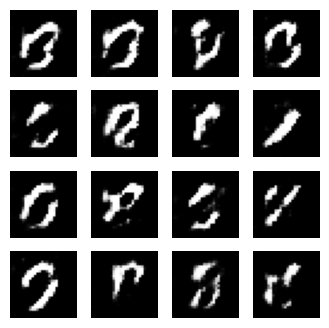

Epoch 10 completed
Epoch 11 completed
Epoch 12 completed
Epoch 13 completed
Epoch 14 completed
Epoch 15 completed
Epoch 16 completed
Epoch 17 completed
Epoch 18 completed
Epoch 19 completed


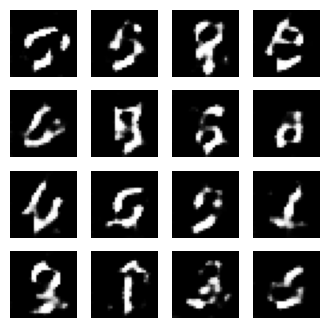

Epoch 20 completed
Epoch 21 completed
Epoch 22 completed
Epoch 23 completed
Epoch 24 completed
Epoch 25 completed
Epoch 26 completed
Epoch 27 completed
Epoch 28 completed
Epoch 29 completed


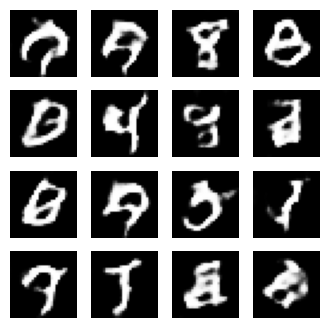

Epoch 30 completed
Epoch 31 completed
Epoch 32 completed
Epoch 33 completed
Epoch 34 completed
Epoch 35 completed
Epoch 36 completed
Epoch 37 completed
Epoch 38 completed
Epoch 39 completed


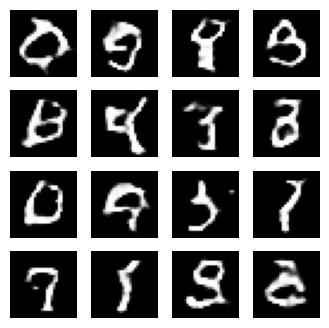

Epoch 40 completed
Epoch 41 completed
Epoch 42 completed
Epoch 43 completed
Epoch 44 completed
Epoch 45 completed
Epoch 46 completed
Epoch 47 completed
Epoch 48 completed
Epoch 49 completed


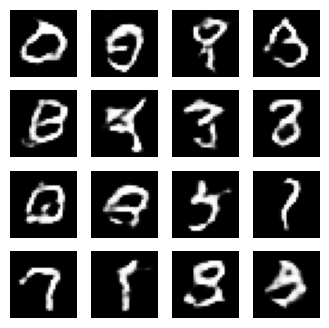

Epoch 50 completed
Epoch 51 completed
Epoch 52 completed
Epoch 53 completed
Epoch 54 completed
Epoch 55 completed
Epoch 56 completed
Epoch 57 completed
Epoch 58 completed
Epoch 59 completed


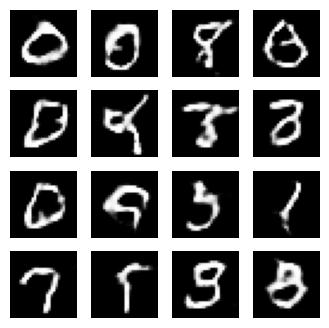

Epoch 60 completed
Epoch 61 completed
Epoch 62 completed
Epoch 63 completed
Epoch 64 completed
Epoch 65 completed
Epoch 66 completed
Epoch 67 completed
Epoch 68 completed
Epoch 69 completed


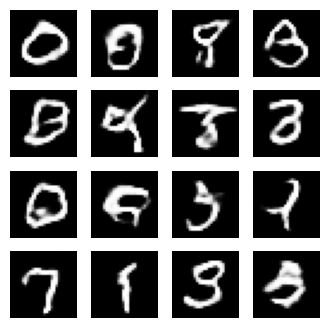

Epoch 70 completed
Epoch 71 completed
Epoch 72 completed
Epoch 73 completed
Epoch 74 completed
Epoch 75 completed
Epoch 76 completed
Epoch 77 completed
Epoch 78 completed
Epoch 79 completed


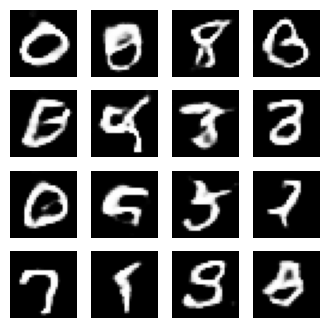

Epoch 80 completed
Epoch 81 completed
Epoch 82 completed
Epoch 83 completed
Epoch 84 completed
Epoch 85 completed
Epoch 86 completed
Epoch 87 completed
Epoch 88 completed
Epoch 89 completed


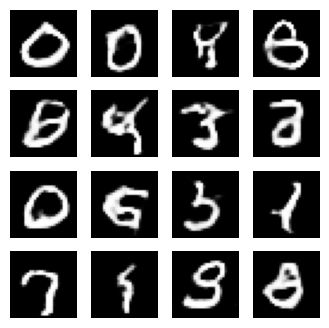

Epoch 90 completed
Epoch 91 completed
Epoch 92 completed
Epoch 93 completed
Epoch 94 completed
Epoch 95 completed
Epoch 96 completed
Epoch 97 completed
Epoch 98 completed
Epoch 99 completed


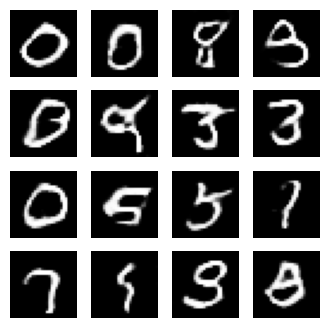

Epoch 100 completed


In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Check if TF is able to detect the gpu
print(tf.config.list_physical_devices('GPU'))

#Set the GPU device to use
device_name = '/device:GPU:0'

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (_, _) = mnist.load_data()

#Normalize the images to [-1, -1]
train_images = (train_images.astype('float32') - 127.5) / 127.5

#Reshape the images to (28, 28, 1) and a channel dimension
train_images = np.expand_dims(train_images, axis=-1)

#Batch and shuffle the data
BUFFER_SIZE = 60000
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


def make_gen_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)

    model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model


def make_disc_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))

    return model


cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)


def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


#Define the models
generator = make_gen_model()
discriminator = make_disc_model()

#Define the optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

#Define the training loop
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 16

@tf.function
def train_step(images):
    #Generate noise
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #Generate fake images
        generated_images = generator(noise, training=True)

        #Evaluate discriminator on real/fake images
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #Calculate the losses
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    #Calculate the gradients and apply them
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


def generate_and_save_images(model, epoch, test_input):
    #Generate images from the model
    predictions = model(test_input, training=False)

    #Rescale to [0, 1]
    predictions = (predictions + 1) / 2.0

    #Plot the images
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')

    #Save the figure
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()


#Generate a fixed set of noise for evaluating the model during training
fixed_noise = tf.random.normal([num_examples_to_generate, noise_dim])

#Train the model
for epoch in range(EPOCHS):
    for image_batch in train_dataset:
        train_step(image_batch)

    #Generate and save images every 10 epochs
    if (epoch + 1) % 10 == 0:
        generate_and_save_images(generator, epoch + 1, fixed_noise)

    #Print progress every epoch
    print('Epoch {} completed'.format(epoch + 1))

Practical 9[A]: Stock Price Prediction using RNN Implement a simple form of a RNN

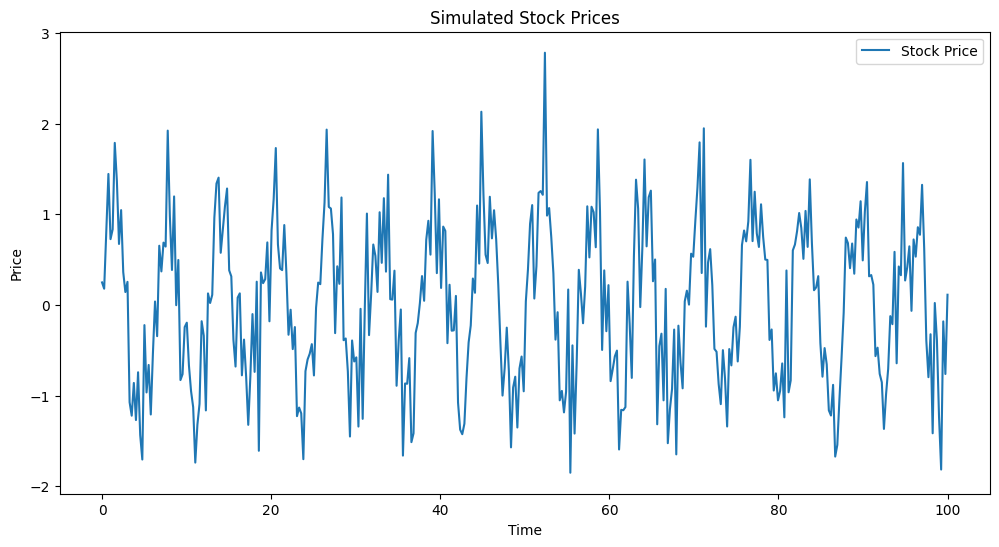

c:\Users\HEAVEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([263])) that is different to the input size (torch.Size([263, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0, loss: 0.48208
Epoch: 100, loss: 0.14921
Epoch: 200, loss: 0.14896
Epoch: 300, loss: 0.14893
Epoch: 400, loss: 0.14892
Epoch: 500, loss: 0.14891
Epoch: 600, loss: 0.14891
Epoch: 700, loss: 0.14891
Epoch: 800, loss: 0.14891
Epoch: 900, loss: 0.14891


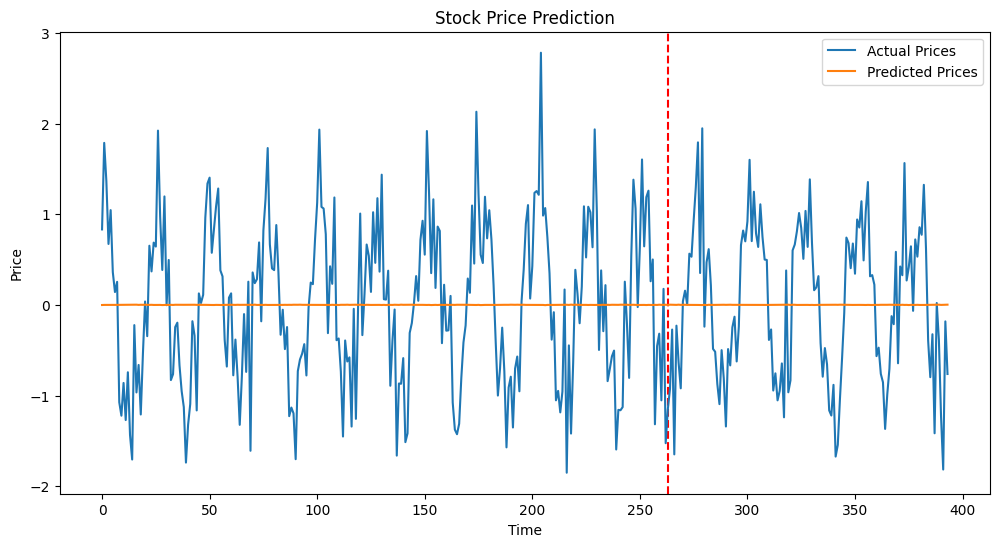

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable

#Simulate some stock prices
np.random.seed(42)
time_steps = np.linspace(0, 100, 400)
prices = np.sin(time_steps) + np.random.normal(scale=0.5, size=len(time_steps))


plt.figure(figsize=(12, 6))
plt.plot(time_steps, prices, label='Stock Price')
plt.title('Simulated Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

from sklearn.preprocessing import MinMaxScaler

#Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
prices_normalized = scaler.fit_transform(prices.reshape(-1, 1)).flatten()

#Prepare the data for RNN
def sliding_windows(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length - 1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)
    return np.array(x), np.array(y)

seq_length = 5
x, y = sliding_windows(prices_normalized, seq_length)

#Split the data into train and test sets
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

#Define a simple RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
      h0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
      out, _ = self.rnn(x, h0)
      out = self.fc(out[:, -1, :])
      return out

num_epochs = 1000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
output_size = 1

model = SimpleRNN(input_size, hidden_size, num_layers, output_size)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Train the model
for epochs in range(num_epochs):
    outputs = model(trainX.unsqueeze(-1))
    optimizer.zero_grad()

    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epochs % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epochs, loss.item()))

#make predictions
model.eval()
train_predict = model(dataX.unsqueeze(-1))
#Invert predections
data_predict = train_predict.data.numpy()
data_predict = scaler.inverse_transform(data_predict).flatten()
#Invert actual prices
actual_prices = scaler.inverse_transform(dataY.data.numpy().reshape(-1, 1)).flatten()
#Plot results
plt.figure(figsize=(12, 6))
plt.axvline(x=train_size, c='r', linestyle='--')
#plotting actual prices
plt.plot(actual_prices, label='Actual Prices')
plt.plot(data_predict, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Practical 9[B]: Using PyTorch

Using device: cpu


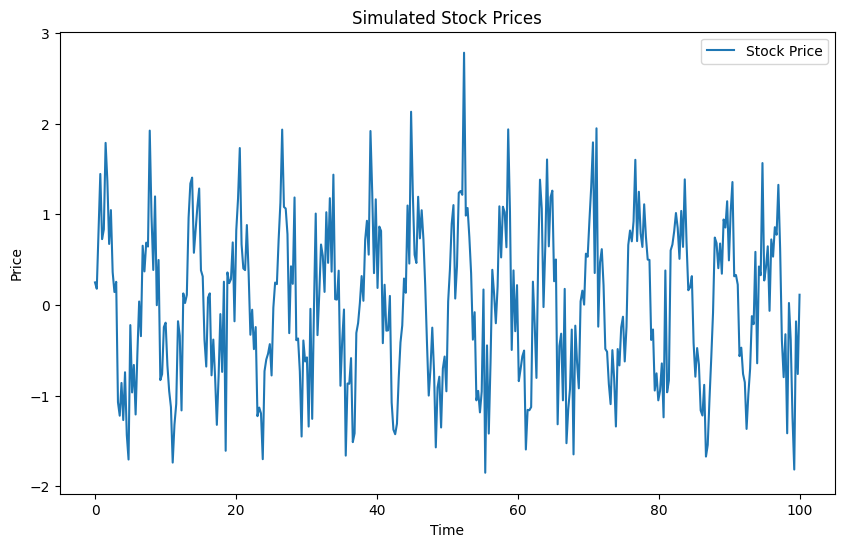

C:\Users\HEAVEN\AppData\Local\Temp\ipykernel_16412\2954422363.py:92: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_amp = torch.cuda.amp.GradScaler()
c:\Users\HEAVEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\amp\grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
C:\Users\HEAVEN\AppData\Local\Temp\ipykernel_16412\2954422363.py:100: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
c:\Users\HEAVEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Epoch [0/500], Loss: 0.201757
Epoch [50/500], Loss: 0.062017
Epoch [100/500], Loss: 0.054589
Epoch [150/500], Loss: 0.053786
Epoch [200/500], Loss: 0.052423
Epoch [250/500], Loss: 0.049597
Epoch [300/500], Loss: 0.047109
Epoch [350/500], Loss: 0.041111
Epoch [400/500], Loss: 0.035447
Epoch [450/500], Loss: 0.027581


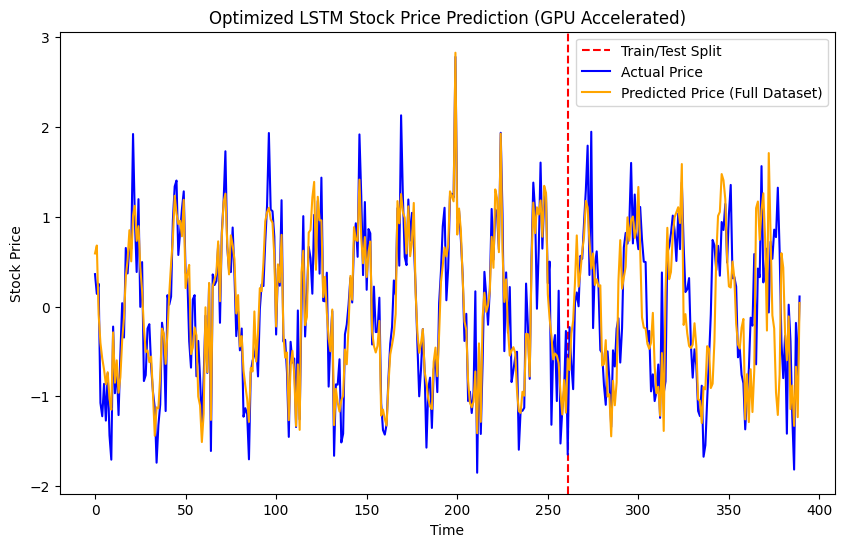

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# Detect GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Simulate Stock Prices
np.random.seed(42)
time_steps = np.linspace(0, 100, 400)
prices = np.sin(time_steps) + np.random.normal(scale=0.5, size=len(time_steps))

# 2. Visualize Data
plt.figure(figsize=(10, 6))
plt.plot(time_steps, prices, label='Stock Price')
plt.title('Simulated Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# 3. Normalize Data
scaler = MinMaxScaler(feature_range=(-1, 1))
prices_normalized = scaler.fit_transform(prices.reshape(-1, 1))

# 4. Prepare Data (Sliding Window)
def sliding_windows(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 10  # Increased sequence length for better learning
x, y = sliding_windows(prices_normalized, seq_length)

# Convert to PyTorch tensors and move to GPU
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

batch_size = 64  # Increase batch size for better GPU utilization
# Create training and test sets
trainX = torch.Tensor(x[:train_size]).view(-1, seq_length, 1).to(device)
trainY = torch.Tensor(y[:train_size]).to(device)

testX = torch.Tensor(x[train_size:]).view(-1, seq_length, 1).to(device)
testY = torch.Tensor(y[train_size:]).to(device)

fullX = torch.Tensor(x).view(-1, seq_length, 1).to(device)  # For full dataset prediction

# 5. Define Optimized LSTM Model
class OptimizedLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(OptimizedLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Enable cuDNN optimizations
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, bidirectional=False).to(device)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
            h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device).detach()
            c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device).detach()

            # Enable cuDNN optimization
            with torch.backends.cudnn.flags(enabled=True):
                out, _ = self.lstm(x, (h0, c0))

            out = self.fc(out[:, -1, :])  # Use last time step output
            return out

# 6. Set Hyperparameters
input_size = 1
hidden_size = 128  # Increased hidden size
num_layers = 3  # More layers for better learning
output_size = 1
num_epochs = 500  # Lower epochs due to larger batch size
learning_rate = 0.001

# 7. Initialize Model, Loss, and Optimizer
model = OptimizedLSTM(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Use mixed precision training (automatic mixed precision AMP)
scaler_amp = torch.cuda.amp.GradScaler()

# 8. Train Model with Mixed Precision
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Use automatic mixed precision for faster computation
    with torch.cuda.amp.autocast():
        outputs = model(trainX)
        loss = criterion(outputs, trainY)

    # Scale loss and backward pass
    scaler_amp.scale(loss).backward()

    # Clip gradients to avoid explosion
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

    # Update weights
    scaler_amp.step(optimizer)
    scaler_amp.update()

    if epoch % 50 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.6f}")

# 9. Evaluate Model
model.eval()
with torch.no_grad():
    train_predict = model(trainX)
    test_predict = model(testX)
    full_predict = model(fullX)  # Predict for the entire dataset

# 10. Move Predictions Back to CPU
train_predict = scaler.inverse_transform(train_predict.cpu().numpy())
test_predict = scaler.inverse_transform(test_predict.cpu().numpy())
full_predict = scaler.inverse_transform(full_predict.cpu().numpy())

actual_prices = scaler.inverse_transform(y)

# 11. Plot Results
plt.figure(figsize=(10, 6))
plt.axvline(x=train_size, c='r', linestyle='--', label='Train/Test Split')

# Plot actual prices
plt.plot(actual_prices, label='Actual Price', color='blue') 

# Plot full dataset predictions
plt.plot(full_predict, label='Predicted Price (Full Dataset)', color='orange')

plt.title('Optimized LSTM Stock Price Prediction (GPU Accelerated)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()